# Lesson N2 &ndash; Advanced NumPy


In this module, we will talk about additional features and functions of the numpy library.


### Outline for this module:


* NumPy Basics
  * Readings
    * PDA Ch 4
  * Topics
    * Boolean indexing
    * Fancy indexing
    * Universal functions
    * np.where()
    * Aggregation
    * Reading and writing arrays to disk
  * Learning goals
    * Learn how to select and transform data in ndarrays
  * Exercises
    * N2.1: Use Boolean indexing to select rows in one array based on values from another array
    * N2.2: Use universal functions to transform data in an array
    * N2.3: Use np.where to selectively transform data in an array
    * N2.4: Write and read an array from disk, use aggregate functions


In order to run the examples in this module, you will first need to run the line of code in the cell below.


In [1]:
import numpy as np

This line imports the numpy library so that we can use it by referring to np.

If you are working in an IDE, you should put the line ``import numpy as np`` at the top of your code.






When running examples in this module, if you ever get an error message about a numpy function not being defined, then you need to need to re-run the cell above.

----------
## Boolean Indexing



In [2]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [3]:
rdata = np.random.randint(low=10, high=99, size=(7,4))
rdata

array([[60, 66, 65, 76],
       [78, 49, 23, 74],
       [51, 82, 69, 90],
       [13, 80, 71, 47],
       [34, 52, 53, 30],
       [77, 85, 69, 56],
       [86, 88, 55, 44]])

We can associate each row with one name from ``names``:




In [4]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [5]:
rdata[names == 'Bob']

array([[60, 66, 65, 76],
       [13, 80, 71, 47]])

In [ ]:
rdata[names == 'Bob', 2:]

-----------------
### Exercise N2.1 &ndash; Use Boolean indexing to select rows in one array based on values from another array

* 1 - Start with the ``names`` and ``rdata`` ndarrays as defined in the previous section:



In [ ]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
rdata = np.random.randint(low=10, high=99, size=(7,4))

* 2 - Write code to select the rows of rdata that are associated with the name 'Joe'


* 3 - Write code to select the second and third column of rdata for rows associated with Will or Bob
  * Hint: use ``mask = (names == 'Bob') | (names == 'Will')``


----------------
###  'Fancy Indexing'

NumPy arrays support an additional way to refer to parts of an ndarray by specifying a list of the row numbers that you would like to retrieve.  This is sometimes called 'Fancy indexing'.

To see how this works, let's first create an 2-dimensional empty ndarray with 8 rows and 4 columns:


In [6]:
a = np.empty((8,4))
a


array([[ 4.67281129e-307,  2.33640564e-307,  4.67265511e-307,
         2.22521306e-307],
       [ 2.78145267e-307,  2.22518420e-307,  2.33646845e-307,
         3.22649121e-307],
       [ 6.89799379e-307,  3.22646744e-307,  3.56035924e-307,
         2.78146116e-307],
       [ 1.89141633e-307,  4.22792892e-307,  1.89144519e-307,
         1.60213602e-306],
       [ 1.60220528e-306,  4.22792892e-307,  4.00540457e-307,
         3.11522733e-307],
       [ 1.44635488e-307, -7.87321364e-312,  1.60217812e-306,
         1.60220528e-306],
       [ 2.00271247e-307,  3.22651837e-307,  2.78150360e-307,
         1.89145538e-307],
       [ 3.56044072e-307,  1.61323966e-307,  3.56043053e-307,
         1.60219306e-306]])

Next, we use a for loop to assign the numbers 0 through 7 to each element in each row of the array as shown below.

Recall that an assignment statement such as ``a[2]=2`` will **broadcast** the number 2 into all the cells in row 2 of the array ``a``.

In [7]:
for i in range(8):
    a[i]=i
print(a)

[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]
 [5. 5. 5. 5.]
 [6. 6. 6. 6.]
 [7. 7. 7. 7.]]


Then we can use fancy indexing to retrieve rows 7, 1, and 4 in that order by specifying them as a list inside the usual ``a[]`` index.

Note that this results in **two** sets of brackets:
  * The outer brackets are the usual brackets used to specify an index
  * The innner brackets are for the **list of row numbers** that we wish to reterieve
  * The array that is returned will contain the rows we specified, in the order that we specified them in the list.
  

In [8]:
a[[4, 7, 1]]

array([[4., 4., 4., 4.],
       [7., 7., 7., 7.],
       [1., 1., 1., 1.]])

--------------
### reshape and transpose



In [9]:
a1 = np.arange(15)
a1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [10]:
a2 = a1.reshape((3,5))
a2

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
a3 = a2.T
a3

In [ ]:
a2

------------
### Universal Functions

* Fast element-wise array functions


In [11]:
a1 = np.arange(10)
a1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
a2 = np.sqrt(a1)
a2

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [ ]:
a1

In [ ]:
a3 = a1 + a2
a3

In [ ]:
a4 = np.add(a1,a2)
a4

#### More universal functions

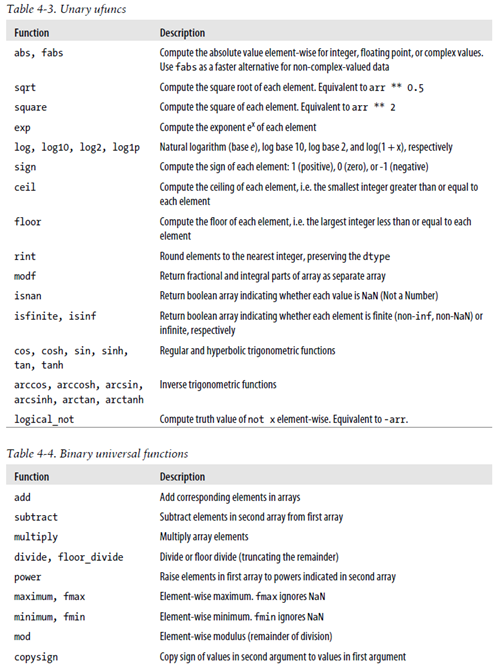


-----------
### Exercise N2.2 &ndash; Use universal functions to transform data in an array

Create the following ndarrays and use universal functions to compute the described results.

* 1 - Create a 2-dimensional (2x3) array called ``x``:

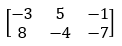







* 2 - Create a 2-dimensional (2x3) array called ``y``:

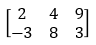


* 3 - Use universal function(s) to create a new array ``z`` that contains each element of ``y`` subtracted from each elemnt of ``x`` (i.e., ``x - y``).


* 4 - Use universal functions to compute a new array ``w`` that contains the absolute values of all the elements of ``z``.


* 5 - Combine #3 and #4 above into **one** line of Python code.

-------------
### np.where()

np.where() is a powerful method that can be used to create new arrays based on the values in an existing array.

First, let's create a 2-dimensional 4x4 array with random numbers:

In [13]:
a7 = np.random.randn(4,4)
a7

array([[-0.63657523,  1.13203796,  1.02481191,  0.10411111],
       [-0.58105018,  0.57554925,  0.34219519, -0.64895278],
       [ 0.98605656,  0.11212207,  1.36432609, -0.34441861],
       [ 1.62865776,  1.24846735, -0.55516511, -1.0749078 ]])

Let's look at one way to use np.where():

np.where takes three agruments:

   1. a conditional expression
   2. a value to place in the new array if the conditional is True
   3. a value to place in the new array if the conditional is False


In [14]:
a8 = np.where(a7>0, 9, 1)
a8

array([[1, 9, 9, 9],
       [1, 9, 9, 1],
       [9, 9, 9, 1],
       [9, 9, 1, 1]])

In the example above, we used np.where to return a new array ``a8`` of the same shape (4x4) where the new cell contains a 9 if the corresponding cell in ``a7`` was greater than 0 and the new cell contains a 1 if the corresponding cell in ``a7`` was not greater than 0.

Notice that the original array is unchanged:

In [ ]:
a7

Let's look at another example:

In [ ]:
a9 = np.where(a7>0, a7, 1)
a9

In the example above, a new array ``a9`` is created that contains a the corresponding number from ``a7`` if that number is greater than zero.  If the corresponding cell in ``a7`` was not greater than zero, then the ``a9`` cell will be set to 1.



One way to think about np.where() is that is is kind of like a for loop with an if statement:


In [ ]:
import numpy as np

x = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
y = np.array([9.1, 9.2, 9.3, 9.4, 9.5])
cond = np.array([True, False, True, True, False])

result = []

for i in range(len(cond)):
    if cond[i] == True:
        result.append(x[i])
    else:
        result.append(y[i])

print("result = ", result)
print()
        
result2 = np.where(cond, x, y)
print("result2 = ", result)


Here is another example using np.where():

In [ ]:
import numpy as np

x = np.array([1, 2, 3, 4, 5])
y = np.array([6, 7, 8, 9, 10])
        
result = np.where(x<=3, x, y)
print ("result = ", result)


--------------
###  Exercise N2.3 &ndash; Use np.where to selectively transform data in an array

* 1 - Create a 2-dimensional array (3x3) called ``x``:

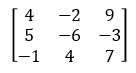

* 2 - Use np.where() to create a new array in which all the negative numbers in x are replaced with zeros, and all the positive numbers are replaced with ones.

* 3 - Use np.where() to create a new array in which all the even numbers in x are kept as they are, but all the odd numbers are replaced with zeros.



* 4 - Create another 2-dimensional array (3x3) called y:

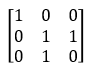

* 5 - Use np.where() to create a new array.  If the value of the cell in y is 1, the new array should contain the value from the corresponding cell of x.  If the value of the cell in y is 0, the new array should contain zero.




--------------------
## Simple aggregation functions with ndarrays

NumPy provides many aggregation functions to use with arrays.

Here are a few commonly used ones:

* mean()
* sum()
* median()
* std() -- returns the standard deviation
* var() -- returns the variance
* amin() -- returns the minimum
* amax() -- returns the maximum


In [15]:
a1 = np.array([[1, 1, 2, 2],[2, 2, 4, 4]])
a1

array([[1, 1, 2, 2],
       [2, 2, 4, 4]])

In [16]:
a1.mean()

2.25

In [ ]:
np.mean(a1)

In [ ]:
a1.sum()

We can also indicate an axis over which to compute the aggregation function:

In [17]:
a1

array([[1, 1, 2, 2],
       [2, 2, 4, 4]])

In [18]:
a1.mean(axis=1)

array([1.5, 3. ])

In [19]:
a1.mean(axis=0)

array([1.5, 1.5, 3. , 3. ])

-------------
### Reading and Writing Arrays to Disk

* Quick and easy way to read/write numpyarrays

* Save & Load

* Stored in a binary format

In [ ]:
import numpy as np

a1 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=np.uint8)
print("a1 = ", a1)

np.save('lesson_n2_a1_data.npy',a1)

a2 = np.load('lesson_n2_a1_data.npy')
print ("a2 = ", a2)

Notice that after you run the code above, a new file called ``lesson_n2_a1_data.npy`` will be created in same directory that your Jupyter notebook is stored in.

This is not a text file -- rather, it is an encoded binary file that NumPy understands how to read back in using np.load().

For example, you could send the .npy file to someone else and they would be able to use np.load() to read in exactly the array that you saved.


--------------
### Exercise N2.4 &ndash; Write and read an array from disk, use aggregate functions


* 1 - Use np.random.randint to create a 1000 row by 20 column array called ``x``.  The array should contain random two digit numbers (i.e. 10 to 99).  Hint: See Exercise 2.1.


* 2 - Use np.save to save the array ``x`` to a file called ``bigarray.npy``.


* 3 - Use np.load to load the array from the file ``bigarray.npy`` into a new array called ``y``.

* 4 - Find the min and max number across of all the cells in the array ``y``.

* 5 - Find the min and max number across the each row of cells in the array ``y``.

* 6 - Find the min and max number across the each column of cells in the array ``y``.

